In [1]:
import re
import string
import numpy as np
import pandas as pd
import nltk
from os import getcwd
from nltk.corpus import twitter_samples
from utils import process_tweet, build_freqs

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/pro/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/pro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [5]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
#split training & testing
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [7]:
#combine two labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [8]:
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [10]:
import matplotlib.pyplot as plt

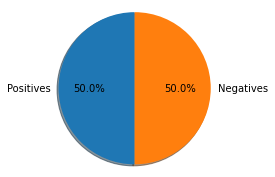

In [11]:
fig = plt.figure(figsize=(3, 3))

labels = 'Positives', 'Negatives'
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  

plt.show()

In [12]:
freqs = build_freqs(train_x, train_y)
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11340


In [13]:
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [15]:
def sigmoid(z): 
    h = 1 / (1 + np.exp(-z))    
    return h

In [16]:
#testing function
if (sigmoid(0) == 0.5):
    print('Perfect!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

Perfect!
CORRECT!


In [17]:
-1 * (1 - 0) * np.log(1 - 0.9999) 

9.210340371976294

In [18]:
-1 * np.log(0.0001)

9.210340371976182

In [61]:
def gradientDescent ( x , y , theta , alpha , num_iters ):
    m  =  len( x )

    for i in  range ( 0 , num_iters ):
        # get z, the dot product of x and theta
        z  =  np.mat( x ) * np.mat( theta )

        # get the sigmoid of z
        h = sigmoid(z)

        # calculate the cost function
        J  =  np.mat (  -1 / m ) * ( np.mat ( y.transpose ()) *  np.mat ( np.log ( h )) +  np.mat (( 1 - y ). transpose ()) *  np.mat ( np.log ( 1  -  h )))

        # update the weights theta
        theta = theta - (( alpha / m )*( np.mat ( x.transpose() ) * np.mat( h - y ) ))

    J = float(J)
    return J, theta

In [62]:
#check the function
np.random.seed(1)
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), (1e-8), 700)

print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[np.round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [array([[4.1000e-07, 3.5658e-04, 7.3090e-05]])]


In [36]:
import math

In [116]:
### Extracting the Features ###
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)
    
    x = np.zeros((1, 3)) 

    x[0,0] = 1 
    for word in word_l:
        if (word, 1.0) in freqs:
            x[0,1] += freqs.get((word, 1.0), 0)
        if (word, 0.0) in freqs:
            x[0,2] += freqs.get((word, 0.0), 0)
    assert(x.shape == (1, 3))
    return x
    

In [117]:
#check the function test 1
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 3.02e+03 6.10e+01]]


In [118]:
#test 2
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [120]:
### Training the model ###
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[np.round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.24216477.
The resulting vector of weights is [array([[ 7.0000e-08,  5.2390e-04, -5.5517e-04]])]


In [124]:
### test Logistic regression ###
def predict_tweet(tweet, freqs, theta):

    x = extract_features(tweet, freqs)
    
    y_pred = sigmoid ( x * theta) 
    
    return y_pred

In [125]:
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.518580
I am bad -> 0.494339
this movie should have been great. -> 0.515331
great -> 0.515464
great great -> 0.530898
great great great -> 0.546273
great great great great -> 0.561561


In [126]:
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

matrix([[0.81636482]])

In [293]:
def test_logistic_regression(test_x, test_y, freqs, theta):

    y_hat = []
    
    for tweet in test_x:

        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1.0)
        else:
            # append 0 to the list
            y_hat.append (0)
    
    if np.asarray(y_hat).all() == np.squeeze(test_y).all():
        arr = np.sum(np.asarray(y_hat))
        arr2 = np.sum(np.squeeze(test_y))
        accuracy = ( arr+ arr2 ) / len(test_x)

    return accuracy


In [294]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9980


In [295]:
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @jaredNOTsubway @iluvmariah @Bravotv Then that truly is a LATERAL move! Now, we all know the Queen Bee is UPWARD BOUND : ) #MovingOnUp
THE PROCESSED TWEET IS: ['truli', 'later', 'move', 'know', 'queen', 'bee', 'upward', 'bound', 'movingonup']
1	0.49996897	b'truli later move know queen bee upward bound movingonup'
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48650628	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48370676	b"i'm play brain dot braindot"
THE TWEET IS: I'm p

In [296]:
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48139091]]
Negative sentiment
